# Data SITREP
redshiftzero, January 26, 2017

We've been collecting traces from crawling onion services, this notebook contains a brief SITREP of the status of the data collection. 

In [14]:
import os
import pandas as pd
import sqlalchemy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

with open(os.environ["PGPASS"], "rb") as f:
    content = f.readline().decode("utf-8").replace("\n", "").split(":")

engine = sqlalchemy.create_engine("postgresql://{user}:{passwd}@{host}/{db}".format(user=content[3],
                                                                         passwd=content[4],
                                                                         host=content[0],
                                                                         db=content[2]))

### Number of Examples

In [3]:
df_examples = pd.read_sql("SELECT * FROM raw.frontpage_examples", con=engine)

We have currently got a sample of:

In [9]:
len(df_examples)

195460

examples.

### Examples collected per day

This was a bit stop and start as you can see:

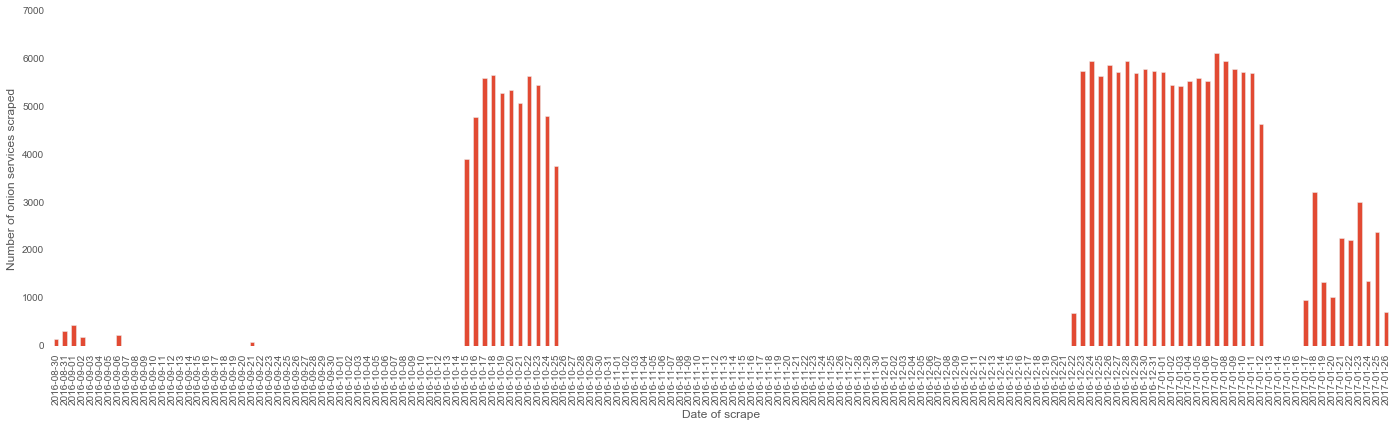

In [13]:
daily = df_examples.set_index('t_scrape').groupby(pd.TimeGrouper(freq='D'))['exampleid'].count()
ax = daily.plot(kind='bar', figsize=(24,6))
ax.set_xlabel('Date of scrape')
ax.set_ylabel('Number of onion services scraped')
ax.grid(False)
ax.set_frame_on(False)

# Prettify ticks, probably a smarter way to do this but sometimes I'm not very smart
xtl=[item.get_text()[:10] for item in ax.get_xticklabels()]
_=ax.set_xticklabels(xtl)

Sanity check the sorter was last run recently:

In [6]:
result = engine.execute('SELECT MAX(t_sort) FROM raw.hs_history')

In [7]:
for row in result:
    print(row)

(datetime.datetime(2017, 1, 17, 20, 55, 58, 326293),)


### crawls

In [8]:
df_crawls = pd.read_sql("SELECT * FROM raw.crawls", con=engine)

There have been:

In [9]:
len(df_crawls)

72131

crawls (the crawlers have clearly failed and restarted a crazy number of times).

### Number of unique onion services scraped

In [6]:
hs_query = """SELECT t1.t_scrape::date, count(distinct t1.hsid)
FROM raw.frontpage_examples t1
group by 1
ORDER BY 1"""

In [7]:
df_hs = pd.read_sql(hs_query, con=engine)

In [14]:
df_hs.set_index('t_scrape', inplace=True)

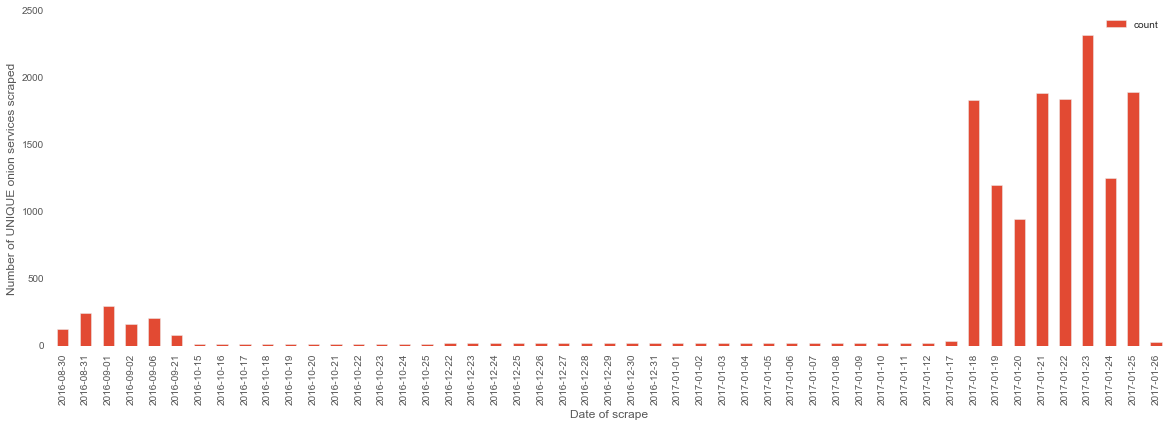

In [15]:
ax = df_hs.plot(kind='bar', figsize=(20,6))
ax.set_xlabel('Date of scrape')
ax.set_ylabel('Number of UNIQUE onion services scraped')
ax.grid(False)
ax.set_frame_on(False)

The many days of very low numbers of unique onion services were when the crawlers were mostly getting traces to SecureDrops

### Number of HS total


In [12]:
pd.read_sql("SELECT count(distinct hsid) FROM raw.frontpage_examples", con=engine)

,count
0,5145


## TL;DR
We've got 200k examples to 5.1k unique onion services collected